In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df_weather = pd.read_csv('weatherAUS.csv')

In [13]:
df_weather.shape

(145460, 23)

In [4]:
df_weather.sample(5, random_state=10000)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
21679,2010-07-15,NorfolkIsland,11.4,18.6,0.0,3.2,4.8,NW,59.0,NNW,...,62.0,65.0,1018.0,1013.7,7.0,5.0,15.1,17.5,No,Yes
19875,2014-01-29,NorahHead,19.3,28.6,0.0,NaN,NaN,NE,43.0,NNE,...,73.0,67.0,1017.2,1014.5,NaN,NaN,21.8,24.0,No,No
3681,2010-10-04,BadgerysCreek,13.8,20.5,28.6,NaN,NaN,ENE,33.0,ESE,...,100.0,65.0,1026.9,1022.9,NaN,NaN,15.9,20.0,Yes,Yes
5911,2017-02-08,BadgerysCreek,20.0,25.4,22.0,NaN,NaN,E,43.0,E,...,91.0,99.0,1022.3,1021.5,NaN,NaN,24.7,23.5,Yes,Yes
10983,2014-07-08,CoffsHarbour,1.8,19.2,0.0,NaN,NaN,NaN,NaN,NaN,...,69.0,40.0,NaN,NaN,NaN,NaN,11.9,18.4,No,No


In [14]:
to_drop = ['Sunshine', 'Evaporation','Cloud9am','Cloud3pm','Location','Date', 'WindGustDir', 'WindDir9am' ]

In [15]:
df = df_weather.copy()

In [16]:
df = df.drop(columns=to_drop)

In [8]:
df.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [17]:
df.isna().sum()*100/df.shape[0]

MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
WindGustSpeed     7.055548
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(119016, 15)

Separar en X e y

In [20]:
x=df.drop('RainTomorrow', axis=1).copy()
y=df.RainTomorrow.copy()

In [21]:
y.value_counts(normalize=True)*100

RainTomorrow
No     78.150837
Yes    21.849163
Name: proportion, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=42, stratify=y)

In [ ]:
X_train

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
140197,17.6,30.3,0.0,31.0,NW,15.0,13.0,59.0,24.0,1014.0,1010.1,21.3,29.5,No
138387,-0.6,18.3,0.0,28.0,E,0.0,9.0,51.0,21.0,1026.8,1022.0,7.7,17.6,No
27191,19.8,27.6,0.0,33.0,ENE,15.0,13.0,57.0,40.0,1019.8,1017.4,21.5,27.2,No
87705,22.6,29.7,1.4,41.0,SE,24.0,28.0,73.0,65.0,1011.9,1009.4,25.9,28.8,Yes
113270,12.8,18.7,0.4,50.0,NW,22.0,28.0,78.0,71.0,1018.6,1016.5,16.7,18.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137106,10.9,25.6,19.8,44.0,SE,17.0,26.0,78.0,29.0,1018.0,1013.4,14.3,24.9,Yes
58276,7.7,27.6,0.0,43.0,NW,9.0,28.0,38.0,16.0,1015.4,1010.4,17.7,27.1,No
47721,7.9,29.3,0.0,33.0,NNE,7.0,11.0,68.0,33.0,1021.1,1016.5,17.3,27.6,No
84932,21.9,29.6,40.0,33.0,ENE,13.0,17.0,70.0,70.0,1010.6,1009.6,27.7,28.2,Yes


In [23]:
X_train.WindDir3pm.unique()

array(['NW', 'E', 'ENE', 'SE', 'SW', 'W', 'WSW', 'NE', 'NNW', 'N', 'S',
       'SSE', 'NNE', 'ESE', 'WNW', 'SSW'], dtype=object)

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
ohe = OneHotEncoder(sparse_output=False).fit(X_train[['WindDir3pm','RainToday']])

In [26]:
encoded = ohe.transform(X_train[['WindDir3pm','RainToday']])
encoded_df = pd.DataFrame(columns=ohe.get_feature_names_out(), data = encoded, index=X_train.index)

X_train = pd.concat([X_train, encoded_df], axis='columns')

In [27]:
encoded_test = ohe.transform(X_test[['WindDir3pm','RainToday']])
encoded_test_df = pd.DataFrame(columns=ohe.get_feature_names_out(), data = encoded_test, index=X_test.index)

X_test = pd.concat([X_test, encoded_test_df], axis='columns')

In [28]:
X_train = X_train.drop(['WindDir3pm','RainToday'], axis=1)

In [29]:
X_test = X_test.drop(['WindDir3pm','RainToday'], axis=1)

In [30]:
## Etiquetado de variable target
reglas = {'Yes': 1, 'No': 0}

y_train = y_train.map(reglas)
y_test = y_test.map(reglas)

--------------------------------------------------------

In [31]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=10, random_state=42).fit(X_train, y_train)
train_pred=clf.predict(X_train)
test_pred = clf.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_train,train_pred))
print('---------------------------------------------------------------')
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     74409
           1       0.79      0.56      0.65     20803

    accuracy                           0.87     95212
   macro avg       0.84      0.76      0.79     95212
weighted avg       0.86      0.87      0.86     95212

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     18603
           1       0.70      0.49      0.58      5201

    accuracy                           0.84     23804
   macro avg       0.78      0.72      0.74     23804
weighted avg       0.83      0.84      0.83     23804



In [ ]:
%%time
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(estimator = DecisionTreeClassifier(max_depth=10, random_state=42), n_estimators=100, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)

CPU times: user 899 ms, sys: 318 ms, total: 1.22 s
Wall time: 1min 27s


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                   random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [ ]:
train_pred=clf.predict(X_train)
test_pred = clf.predict(X_test)

print(classification_report(y_train,train_pred))
print('---------------------------------------------------------------')
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     74409
           1       0.85      0.56      0.67     20803

    accuracy                           0.88     95212
   macro avg       0.87      0.77      0.80     95212
weighted avg       0.88      0.88      0.87     95212

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     18603
           1       0.75      0.50      0.60      5201

    accuracy                           0.85     23804
   macro avg       0.81      0.73      0.75     23804
weighted avg       0.85      0.85      0.84     23804



In [97]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

CPU times: user 34.4 s, sys: 120 ms, total: 34.6 s
Wall time: 37.2 s


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:
train_pred=clf.predict(X_train)
test_pred = clf.predict(X_test)

print(classification_report(y_train,train_pred))
print('---------------------------------------------------------------')
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89     74409
           1       0.59      0.78      0.67     20803

    accuracy                           0.83     95212
   macro avg       0.76      0.81      0.78     95212
weighted avg       0.86      0.83      0.84     95212

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.84      0.88     18603
           1       0.56      0.74      0.63      5201

    accuracy                           0.81     23804
   macro avg       0.74      0.79      0.76     23804
weighted avg       0.84      0.81      0.82     23804



In [ ]:
clf.feature_importances_

array([0.0272783 , 0.02758749, 0.09173653, 0.07542867, 0.01026658,
       0.01497046, 0.07200709, 0.34810801, 0.05821588, 0.08176939,
       0.01987027, 0.04412316, 0.00063804, 0.00067935, 0.00071904,
       0.00418403, 0.0016688 , 0.00201721, 0.00285796, 0.00177458,
       0.00115798, 0.00081745, 0.00115626, 0.00123141, 0.00144915,
       0.00113355, 0.00163801, 0.00108347, 0.05503824, 0.04939361])

In [ ]:
fi = pd.DataFrame(columns=['FEATURE', 'IMPORTANCE'])
fi['FEATURE'] = X_train.columns
fi['IMPORTANCE'] = clf.feature_importances_
fi = fi.sort_values('IMPORTANCE', ascending=False)

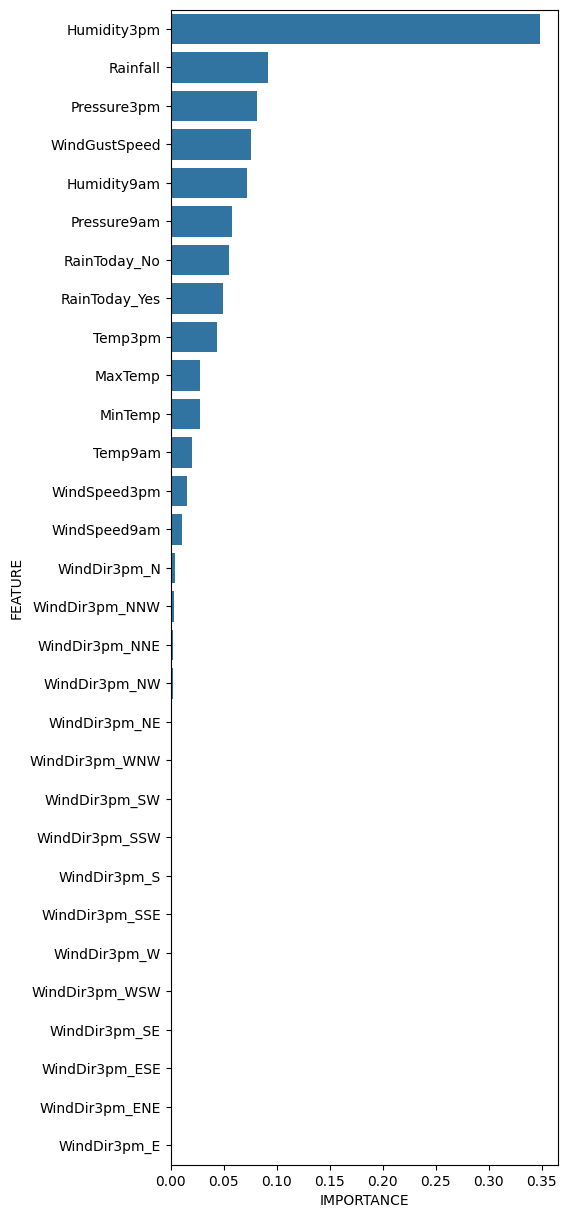

In [ ]:
plt.figure(figsize=(5,15))
sns.barplot(y=fi.FEATURE, x=fi.IMPORTANCE)
plt.show()

In [70]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=200, random_state=0)

In [71]:
%%time
abc.fit(X_train, y_train)

CPU times: user 22.4 s, sys: 27.1 ms, total: 22.4 s
Wall time: 22.5 s


AdaBoostClassifier(n_estimators=200, random_state=0)

In [72]:
y_train_pred = abc.predict(X_train)
y_test_pred = abc.predict(X_test)

print(classification_report(y_train,train_pred))
print('---------------------------------------------------------------')
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     74409
           1       0.79      0.56      0.65     20803

    accuracy                           0.87     95212
   macro avg       0.84      0.76      0.79     95212
weighted avg       0.86      0.87      0.86     95212

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     18603
           1       0.70      0.49      0.58      5201

    accuracy                           0.84     23804
   macro avg       0.78      0.72      0.74     23804
weighted avg       0.83      0.84      0.83     23804



In [40]:
abc.feature_importances_

array([0.035, 0.035, 0.045, 0.115, 0.035, 0.035, 0.05 , 0.27 , 0.11 ,
       0.13 , 0.06 , 0.02 , 0.   , 0.   , 0.   , 0.005, 0.005, 0.01 ,
       0.005, 0.005, 0.005, 0.   , 0.005, 0.005, 0.005, 0.005, 0.005,
       0.   , 0.   , 0.   ])

In [38]:
fi = pd.DataFrame(columns=['FEATURE', 'IMPORTANCE'])
fi['FEATURE'] = X_train.columns
fi['IMPORTANCE'] = abc.feature_importances_
fi = fi.sort_values('IMPORTANCE', ascending=False)

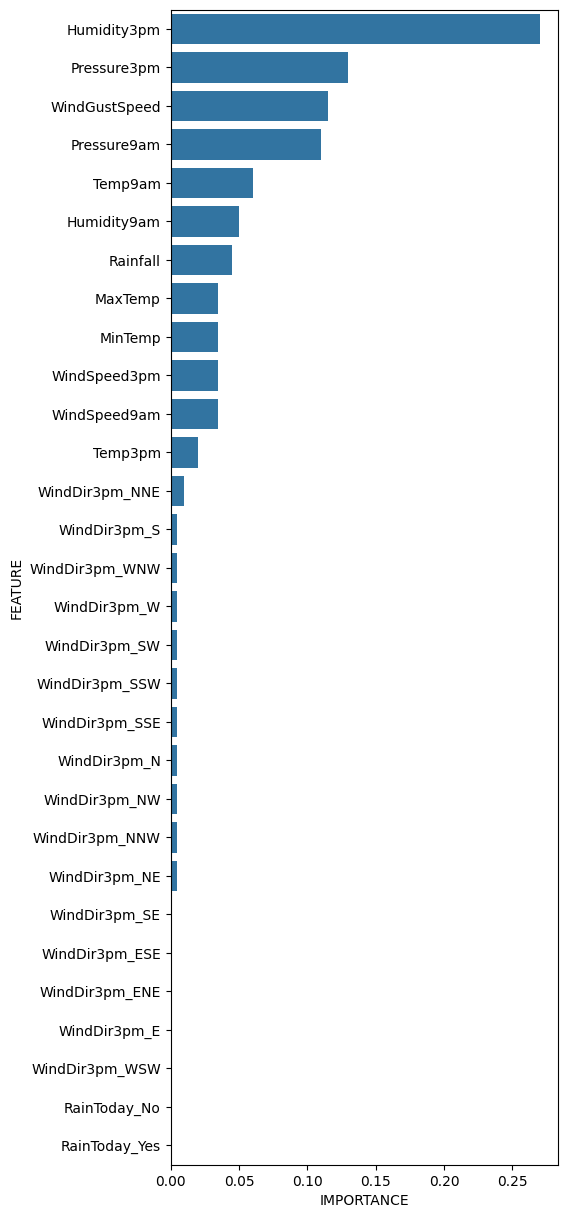

In [39]:
plt.figure(figsize=(5,15))
sns.barplot(y=fi.FEATURE, x=fi.IMPORTANCE)
plt.show()

In [41]:
from xgboost import XGBClassifier

In [78]:
xgb = XGBClassifier(n_estimators=200)

In [88]:
%%time
xgb_2.fit(X_train, y_train)

CPU times: user 8.57 s, sys: 38.3 ms, total: 8.61 s
Wall time: 4.49 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [89]:
y_train_pred = xgb_2.predict(X_train)
y_test_pred = xgb_2.predict(X_test)

print(classification_report(y_train,y_train_pred))
print('---------------------------------------------------------------')
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74409
           1       1.00      1.00      1.00     20803

    accuracy                           1.00     95212
   macro avg       1.00      1.00      1.00     95212
weighted avg       1.00      1.00      1.00     95212

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     18603
           1       0.66      0.55      0.60      5201

    accuracy                           0.84     23804
   macro avg       0.77      0.74      0.75     23804
weighted avg       0.83      0.84      0.84     23804



In [92]:
fi = pd.DataFrame(columns=['FEATURE', 'IMPORTANCE'])
fi['FEATURE'] = X_train.columns
fi['IMPORTANCE'] = xgb_2.feature_importances_
fi = fi.sort_values('IMPORTANCE', ascending=False)

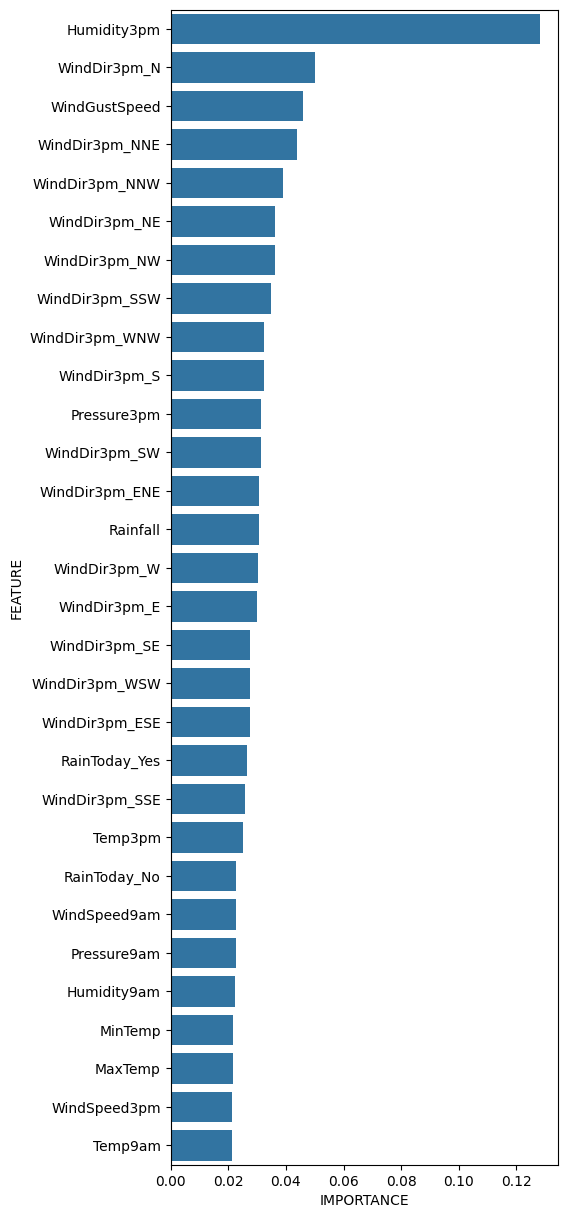

In [93]:
plt.figure(figsize=(5,15))
sns.barplot(y=fi.FEATURE, x=fi.IMPORTANCE)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearch, train_test_split

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

tabla_de_hiperparametros={
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 1],
    'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=tabla_de_hiperparametros, cv=3, scoring='accucary', n_jobs=-1)

grid_search.fit(X_train, y_train)

In [87]:
xgb_2 = XGBClassifier(n_estimators=200,
                      max_depth=10,
                      learning_rate=1,
                      colsample_bytree=0.8,
                      gamma=0,
                      random_state=42
                      )

In [95]:
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier

In [98]:
estimators=[
            ('rf', RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1, random_state=42)),
            ('xgb', XGBClassifier(n_estimators=200)),
            ('lgbm', LGBMClassifier(n_estimators=200))
]

In [99]:
clf = StackingClassifier(
    estimators=estimators, final_estimator = DecisionTreeClassifier(max_depth=5)
)

In [101]:
%%time
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 20803, number of negative: 74409
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 95212, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218491 -> initscore=-1.274480
[LightGBM] [Info] Start training from score -1.274480
[LightGBM] [Info] Number of positive: 16642, number of negative: 59527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2158
[LightGBM] [Info] Number of data points in the train set: 76169, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218488 -> initscore=-1.274500
[L

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=200,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('lgbm', LGBMClassifier(n_estimators=200))],
                   final_estimator=DecisionTreeClassifier(max_depth=5))

In [102]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(classification_report(y_train,y_train_pred))
print('---------------------------------------------------------------')
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93     74409
           1       0.82      0.57      0.67     20803

    accuracy                           0.88     95212
   macro avg       0.85      0.77      0.80     95212
weighted avg       0.87      0.88      0.87     95212

---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     18603
           1       0.75      0.53      0.62      5201

    accuracy                           0.86     23804
   macro avg       0.82      0.74      0.77     23804
weighted avg       0.85      0.86      0.85     23804

